In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import scipy.stats as scp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df_70s = pd.read_csv('../1970.csv')

In [3]:
total_rows, total_attributes = df_70s.shape

print('Total Rows:', total_rows)
print('Total Columns:', total_attributes)

Total Rows: 104
Total Columns: 15


The 70s song dataset contains 15 attributes with 104 data rows.

In [4]:
df_70s.head(5)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award
0,Bohemian Rhapsody - 2011 Mix,Queen,glam rock,1975,71,40,41,-10,30,22,354,27,5,84,1.0
1,Highway to Hell,AC/DC,album rock,1979,116,91,57,-5,16,42,208,6,13,83,0.0
2,Don't Stop Me Now - 2011 Mix,Queen,glam rock,1978,156,87,56,-5,78,61,209,5,17,82,1.0
3,Rocket Man (I Think It's Going To Be A Long Lo...,Elton John,glam rock,1972,137,53,60,-9,9,34,282,43,3,81,1.0
4,We Will Rock You - Remastered,Queen,glam rock,1977,81,50,69,-7,26,48,122,68,12,79,0.0


In [5]:
# Column overview
df_70s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          104 non-null    object 
 1   artist         104 non-null    object 
 2   genre          104 non-null    object 
 3   year           104 non-null    int64  
 4   bpm            104 non-null    int64  
 5   nrgy           104 non-null    int64  
 6   dnce           104 non-null    int64  
 7   dB             104 non-null    int64  
 8   live           104 non-null    int64  
 9   val            104 non-null    int64  
 10  dur            104 non-null    int64  
 11  acous          104 non-null    int64  
 12  spch           104 non-null    int64  
 13  popularity     104 non-null    int64  
 14  has_win_award  104 non-null    float64
dtypes: float64(1), int64(11), object(3)
memory usage: 12.3+ KB


From the statistics, it is known that the data does not contain null values. (The non-null count equals the number of rows in the data).

### Statistics

Genre Count

In [6]:
genre_arr = df_70s['genre']
genre_count = genre_arr.value_counts()
display(genre_count)

album rock             31
adult standards        19
glam rock              16
europop                 7
disco                   6
soft rock               4
classic uk pop          3
classic soul            3
chicago soul            2
dance pop               2
country rock            2
brit funk               1
country                 1
classic country pop     1
dance rock              1
pop                     1
hollywood               1
british folk            1
british invasion        1
native american         1
Name: genre, dtype: int64

From the value count, it is known that the majority of the most popular songs from the 70s has an album rock genre, followed by adult standards, and glam rock. 

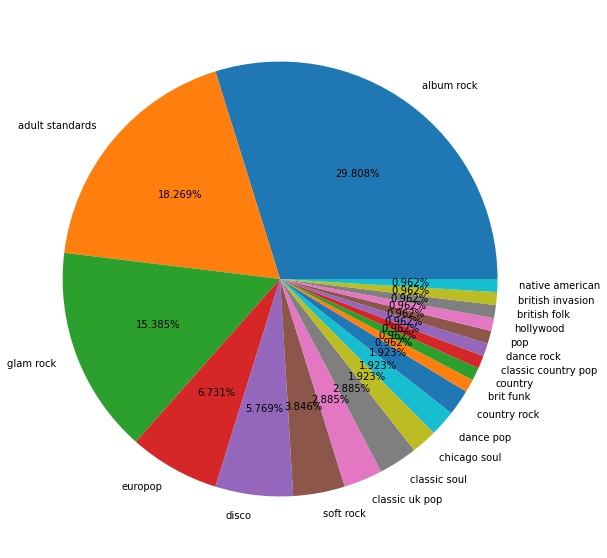

In [7]:
# Data visualization
plt.figure(figsize=(10,10))
plt.pie(genre_arr.value_counts(), labels=genre_count.index.tolist(), autopct='%1.3f%%')
plt.show()

### BPM

In [8]:
bpm_arr = df_70s['bpm']

In [9]:
# Compute additional information
Q1 = np.percentile(bpm_arr, 25, interpolation='midpoint')
Q3 = np.percentile(bpm_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

bpm_stats = [
    ['Mean', np.mean(bpm_arr)],
    ['Median', np.median(bpm_arr)],
    ['Mode', scp.mode(bpm_arr)[0][0]],
    ['Standard Deviation', np.std(bpm_arr)],
    ['Variance', np.var(bpm_arr)],
    ['Minimum', np.min(bpm_arr)],
    ['Maximum', np.max(bpm_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('BPM Description')
display(pd.DataFrame(bpm_stats, columns=['Measure', 'Value']))

BPM Description


,Measure,Value
0,Mean,120.875000
1,Median,120.500000
2,Mode,107.000000
3,Standard Deviation,23.205473
4,Variance,538.493990
5,Minimum,64.000000
6,Maximum,199.000000
7,Q1,106.000000
8,Q3,135.500000
9,IQR,29.500000


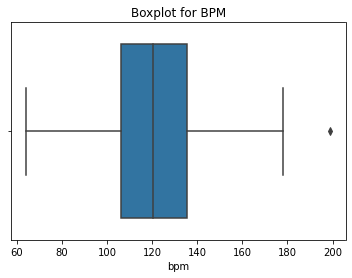

Outlier exists?  True


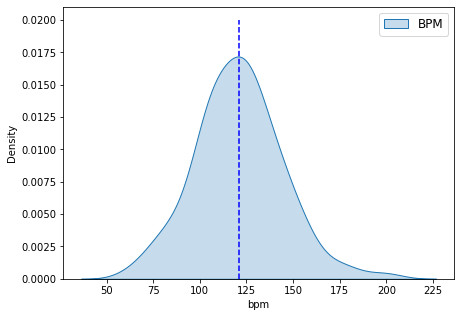

In [10]:
plt.title("Boxplot for BPM")
sns.boxplot(x='bpm', data=df_70s)
plt.show()

Q1 = np.percentile(bpm_arr, 25, interpolation='midpoint')
Q3 = np.percentile(bpm_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(bpm_arr) > RUB)

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=bpm_arr, shade=True)
plt.legend(['BPM'], fontsize=12)
plt.vlines(x=bpm_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.show()

Although outlier exists, from the KDE plot, it is shown that the data is slightly skewed to the left (positive skew). Nevertheless, the gaussian normal shape still retained. 

As outlier exists and the data is numerical (not categorical), the median best describes the bpm column. However, the exact value of the mean and median is roughly equal. It is shown that the average and median bpm of the most popular songs in the 70s is 120. 

#### NRGY

In [11]:
nrgy_arr = df_70s['nrgy']

In [12]:
# Compute additional information
Q1 = np.percentile(nrgy_arr, 25, interpolation='midpoint')
Q3 = np.percentile(nrgy_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

nrgy_stats = [
    ['Mean', np.mean(nrgy_arr)],
    ['Median', np.median(nrgy_arr)],
    ['Mode', scp.mode(nrgy_arr)[0][0]],
    ['Standard Deviation', np.std(nrgy_arr)],
    ['Variance', np.var(nrgy_arr)],
    ['Minimum', np.min(nrgy_arr)],
    ['Maximum', np.max(nrgy_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('NRGY Description')
display(pd.DataFrame(nrgy_stats, columns=['Measure', 'Value']))

NRGY Description


,Measure,Value
0,Mean,62.961538
1,Median,67.500000
2,Mode,91.000000
3,Standard Deviation,21.538393
4,Variance,463.902367
5,Minimum,13.000000
6,Maximum,97.000000
7,Q1,44.500000
8,Q3,79.500000
9,IQR,35.000000


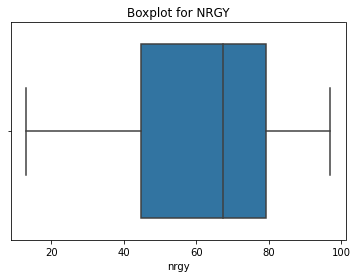

Outlier exists?  False


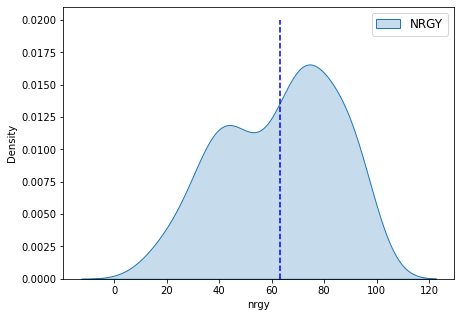

In [13]:
plt.title("Boxplot for NRGY")
sns.boxplot(x='nrgy', data=df_70s)
plt.show()

Q1 = np.percentile(nrgy_arr, 25, interpolation='midpoint')
Q3 = np.percentile(nrgy_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(nrgy_arr) > RUB)

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=nrgy_arr, shade=True)
plt.legend(['NRGY'], fontsize=12)
plt.vlines(x=nrgy_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.show()

It can be seen that there exist no outlier in this data. However, the distribution of the nrgy among the most popular songs in the 70s is bimodal. The 2 modes are 40 and 80.

#### DNCE

In [14]:
dnce_arr = df_70s['dnce']

In [15]:
# Compute additional information
Q1 = np.percentile(dnce_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dnce_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

dnce_stats = [
    ['Mean', np.mean(dnce_arr)],
    ['Median', np.median(dnce_arr)],
    ['Mode', scp.mode(dnce_arr)[0][0]],
    ['Standard Deviation', np.std(dnce_arr)],
    ['Variance', np.var(dnce_arr)],
    ['Minimum', np.min(dnce_arr)],
    ['Maximum', np.max(dnce_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('DNCE Description')
display(pd.DataFrame(dnce_stats, columns=['Measure', 'Value']))

DNCE Description


,Measure,Value
0,Mean,56.596154
1,Median,57.000000
2,Mode,52.000000
3,Standard Deviation,14.600790
4,Variance,213.183062
5,Minimum,26.000000
6,Maximum,83.000000
7,Q1,45.000000
8,Q3,68.500000
9,IQR,23.500000


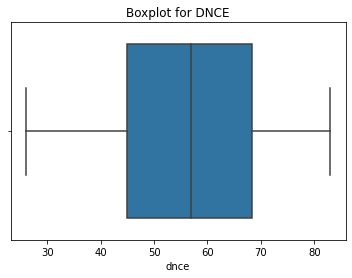

Outlier exists?  False


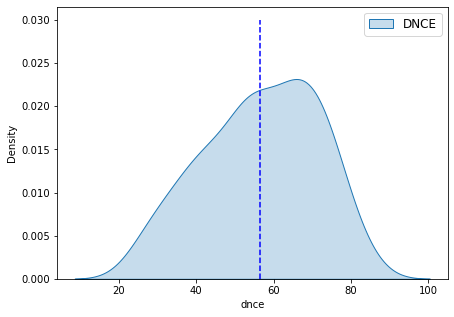

In [16]:
plt.title("Boxplot for DNCE")
sns.boxplot(x='dnce', data=df_70s)
plt.show()

Q1 = np.percentile(dnce_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dnce_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(dnce_arr) > RUB)

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=dnce_arr, shade=True)
plt.legend(['DNCE'], fontsize=12)
plt.vlines(x=dnce_arr.mean(), ymin=0, ymax=0.03, color='blue', linestyle='--')
plt.show()

We can measure the skewness as follows. 

In [17]:
dnce_arr.skew()

-0.29341127953211477

Slightly negatively skewed.

#### dB

In [18]:
db_arr = df_70s['dB']

In [19]:
# Compute additional information
Q1 = np.percentile(db_arr, 25, interpolation='midpoint')
Q3 = np.percentile(db_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

db_stats = [
    ['Mean', np.mean(db_arr)],
    ['Median', np.median(db_arr)],
    ['Mode', scp.mode(db_arr)[0][0]],
    ['Standard Deviation', np.std(db_arr)],
    ['Variance', np.var(db_arr)],
    ['Minimum', np.min(db_arr)],
    ['Maximum', np.max(db_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('DB Description')
display(pd.DataFrame(db_stats, columns=['Measure', 'Value']))

DB Description


,Measure,Value
0,Mean,-9.000000
1,Median,-9.000000
2,Mode,-10.000000
3,Standard Deviation,3.107064
4,Variance,9.653846
5,Minimum,-17.000000
6,Maximum,-4.000000
7,Q1,-11.000000
8,Q3,-7.000000
9,IQR,4.000000


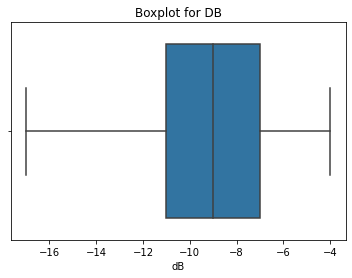

Outlier exists?  False


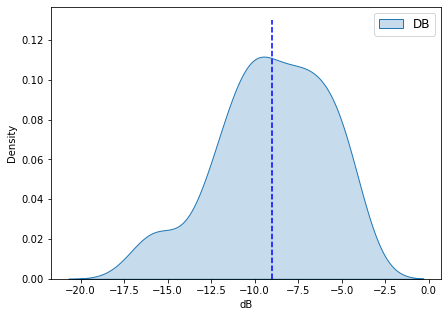

In [20]:
plt.title("Boxplot for DB")
sns.boxplot(x='dB', data=df_70s)
plt.show()

Q1 = np.percentile(db_arr, 25, interpolation='midpoint')
Q3 = np.percentile(db_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(db_arr) > RUB)

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=db_arr, shade=True)
plt.legend(['DB'], fontsize=12)
plt.vlines(x=db_arr.mean(), ymin=0, ymax=0.13, color='blue', linestyle='--')
plt.show()

#### LIVE

In [21]:
live_arr = df_70s['live']

In [22]:
# Compute additional information
Q1 = np.percentile(live_arr, 25, interpolation='midpoint')
Q3 = np.percentile(live_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

live_stats = [
    ['Mean', np.mean(live_arr)],
    ['Median', np.median(live_arr)],
    ['Mode', scp.mode(live_arr)[0][0]],
    ['Standard Deviation', np.std(live_arr)],
    ['Variance', np.var(live_arr)],
    ['Minimum', np.min(live_arr)],
    ['Maximum', np.max(live_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('LIVE Description')
display(pd.DataFrame(live_stats, columns=['Measure', 'Value']))

LIVE Description


,Measure,Value
0,Mean,19.634615
1,Median,14.000000
2,Mode,12.000000
3,Standard Deviation,13.238244
4,Variance,175.251109
5,Minimum,4.000000
6,Maximum,78.000000
7,Q1,11.000000
8,Q3,25.500000
9,IQR,14.500000


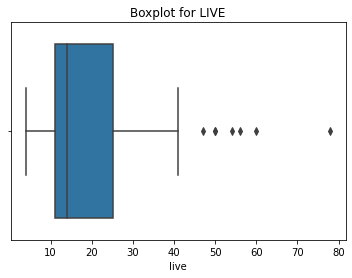

Outlier exists?  True


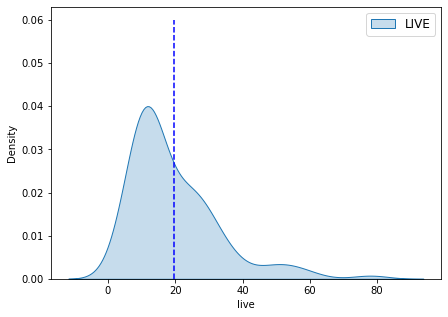

In [23]:
plt.title("Boxplot for LIVE")
sns.boxplot(x='live', data=df_70s)
plt.show()

Q1 = np.percentile(live_arr, 25, interpolation='midpoint')
Q3 = np.percentile(live_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(live_arr) > RUB)

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=live_arr, shade=True)
plt.legend(['LIVE'], fontsize=12)
plt.vlines(x=live_arr.mean(), ymin=0, ymax=0.06, color='blue', linestyle='--')
plt.show()

As can be seen, outliers exist in this data. Therefore, the mean cannot be used to represent the data. As shown, mode < median < mean, indicating that the data is skewed to the left. The skewness exists because there are outliers (exceeding RUB) in the data. Based on the data context, this happens as there are several songs that is very likely to be recorded live. Nevertheless, from the distribution it can be seen that more songs are not a live recording.

#### VAL

In [24]:
val_arr = df_70s['val']

In [25]:
# Compute additional information
Q1 = np.percentile(val_arr, 25, interpolation='midpoint')
Q3 = np.percentile(val_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

val_stats = [
    ['Mean', np.mean(val_arr)],
    ['Median', np.median(val_arr)],
    ['Mode', scp.mode(val_arr)[0][0]],
    ['Standard Deviation', np.std(val_arr)],
    ['Variance', np.var(val_arr)],
    ['Minimum', np.min(val_arr)],
    ['Maximum', np.max(val_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('VAL Description')
display(pd.DataFrame(val_stats, columns=['Measure', 'Value']))

VAL Description


,Measure,Value
0,Mean,62.942308
1,Median,67.500000
2,Mode,96.000000
3,Standard Deviation,24.634180
4,Variance,606.842825
5,Minimum,7.000000
6,Maximum,98.000000
7,Q1,44.500000
8,Q3,83.000000
9,IQR,38.500000


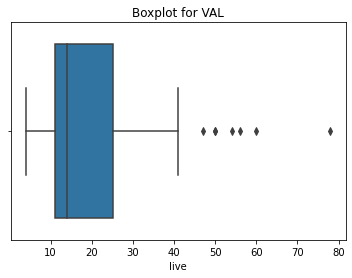

Outlier exists?  False


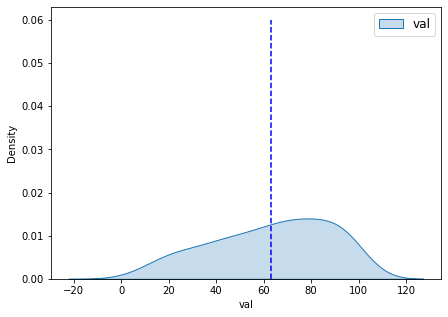

In [26]:
plt.title("Boxplot for VAL")
sns.boxplot(x='live', data=df_70s)
plt.show()

Q1 = np.percentile(val_arr, 25, interpolation='midpoint')
Q3 = np.percentile(val_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(val_arr) > RUB)

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=val_arr, shade=True)
plt.legend(['val'], fontsize=12)
plt.vlines(x=val_arr.mean(), ymin=0, ymax=0.06, color='blue', linestyle='--')
plt.show()

In [27]:
val_arr.skew()

-0.4043799381463815

The data is negatively skewed. In this case, mean < median < mode. With the mode at 96, it can be seen that the majority of the song has a more positive mood. 

#### DUR

In [28]:
dur_arr = df_70s['dur']

In [29]:
# Compute additional information
Q1 = np.percentile(dur_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dur_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

dur_stats = [
    ['Mean', np.mean(dur_arr)],
    ['Median', np.median(dur_arr)],
    ['Mode', scp.mode(dur_arr)[0][0]],
    ['Standard Deviation', np.std(dur_arr)],
    ['Variance', np.var(dur_arr)],
    ['Minimum', np.min(dur_arr)],
    ['Maximum', np.max(dur_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('DUR Description')
display(pd.DataFrame(dur_stats, columns=['Measure', 'Value']))

DUR Description


,Measure,Value
0,Mean,232.269231
1,Median,221.000000
2,Mode,213.000000
3,Standard Deviation,56.937251
4,Variance,3241.850592
5,Minimum,116.000000
6,Maximum,511.000000
7,Q1,197.500000
8,Q3,267.000000
9,IQR,69.500000


Note: The variance is relatively large. This implies that the duration of the most popular songs in 1970s greatly vary from one another.

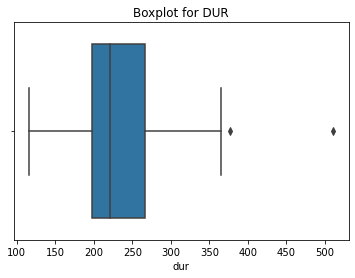

Outlier exists?  True


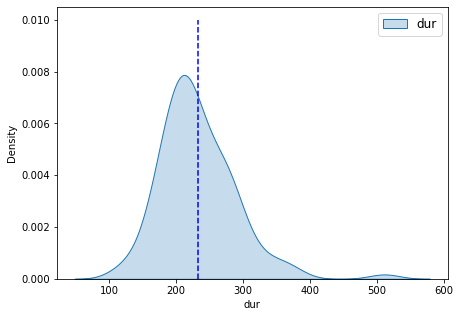

In [30]:
plt.title("Boxplot for DUR")
sns.boxplot(x='dur', data=df_70s)
plt.show()

Q1 = np.percentile(dur_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dur_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(dur_arr) > RUB)

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=dur_arr, shade=True)
plt.legend(['dur'], fontsize=12)
plt.vlines(x=dur_arr.mean(), ymin=0, ymax=0.01, color='blue', linestyle='--')
plt.show()

#### ACOUS

In [31]:
acous_arr = df_70s['acous']

In [32]:
# Compute additional information
Q1 = np.percentile(acous_arr, 25, interpolation='midpoint')
Q3 = np.percentile(acous_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

acous_stats = [
    ['Mean', np.mean(acous_arr)],
    ['Median', np.median(acous_arr)],
    ['Mode', scp.mode(acous_arr)[0][0]],
    ['Standard Deviation', np.std(acous_arr)],
    ['Variance', np.var(acous_arr)],
    ['Minimum', np.min(acous_arr)],
    ['Maximum', np.max(acous_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('ACOUS Description')
display(pd.DataFrame(acous_stats, columns=['Measure', 'Value']))

ACOUS Description


,Measure,Value
0,Mean,31.048077
1,Median,23.500000
2,Mode,6.000000
3,Standard Deviation,27.002272
4,Variance,729.122689
5,Minimum,0.000000
6,Maximum,94.000000
7,Q1,9.000000
8,Q3,42.500000
9,IQR,33.500000


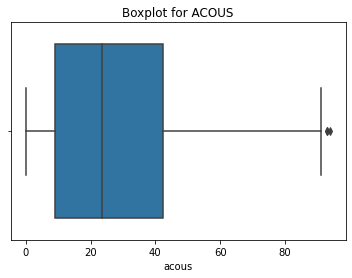

Outlier exists?  False


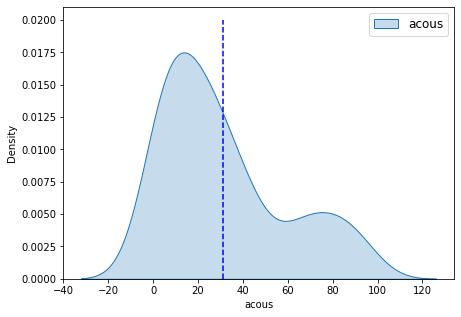

In [33]:
plt.title("Boxplot for ACOUS")
sns.boxplot(x='acous', data=df_70s)
plt.show()

Q1 = np.percentile(dur_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dur_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(acous_arr) > RUB)

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=acous_arr, shade=True)
plt.legend(['acous'], fontsize=12)
plt.vlines(x=acous_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.show()

From the distribution, it can be seen that the a majority of the song tends to have a lower acous value. (This is in accordance to the fact that a majority of them belongs to a rock genre).

#### SPCH

In [34]:
spch_arr = df_70s['spch']

In [35]:
# Compute additional information
Q1 = np.percentile(spch_arr, 25, interpolation='midpoint')
Q3 = np.percentile(spch_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

spch_stats = [
    ['Mean', np.mean(spch_arr)],
    ['Median', np.median(spch_arr)],
    ['Mode', scp.mode(spch_arr)[0][0]],
    ['Standard Deviation', np.std(spch_arr)],
    ['Variance', np.var(spch_arr)],
    ['Minimum', np.min(spch_arr)],
    ['Maximum', np.max(spch_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('SPCH Description')
display(pd.DataFrame(spch_stats, columns=['Measure', 'Value']))

SPCH Description


,Measure,Value
0,Mean,4.750000
1,Median,4.000000
2,Mode,3.000000
3,Standard Deviation,2.723650
4,Variance,7.418269
5,Minimum,3.000000
6,Maximum,17.000000
7,Q1,3.000000
8,Q3,5.000000
9,IQR,2.000000


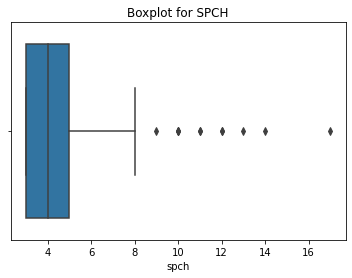

Outlier exists?  True


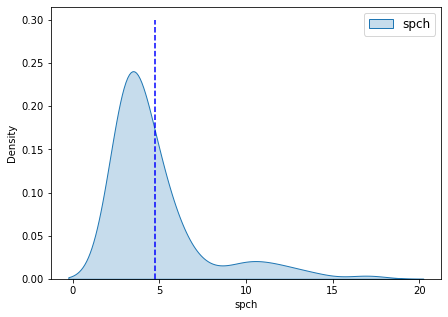

In [36]:
plt.title("Boxplot for SPCH")
sns.boxplot(x='spch', data=df_70s)
plt.show()

Q1 = np.percentile(spch_arr, 25, interpolation='midpoint')
Q3 = np.percentile(spch_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(spch_arr) > RUB)

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=spch_arr, shade=True)
plt.legend(['spch'], fontsize=12)
plt.vlines(x=spch_arr.mean(), ymin=0, ymax=0.3, color='blue', linestyle='--')
plt.show()

#### POPULARITY

In [37]:
popularity_arr = df_70s['popularity']

In [38]:
# Compute additional information
Q1 = np.percentile(popularity_arr, 25, interpolation='midpoint')
Q3 = np.percentile(popularity_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

popularity_stats = [
    ['Mean', np.mean(popularity_arr)],
    ['Median', np.median(popularity_arr)],
    ['Mode', scp.mode(popularity_arr)[0][0]],
    ['Standard Deviation', np.std(popularity_arr)],
    ['Variance', np.var(popularity_arr)],
    ['Minimum', np.min(popularity_arr)],
    ['Maximum', np.max(popularity_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('POPULARITY Description')
display(pd.DataFrame(popularity_stats, columns=['Measure', 'Value']))

POPULARITY Description


,Measure,Value
0,Mean,64.971154
1,Median,65.000000
2,Mode,56.000000
3,Standard Deviation,9.436485
4,Variance,89.047245
5,Minimum,40.000000
6,Maximum,84.000000
7,Q1,58.000000
8,Q3,73.500000
9,IQR,15.500000


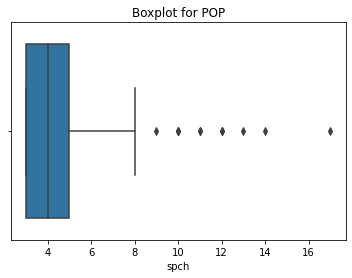

Outlier exists?  False


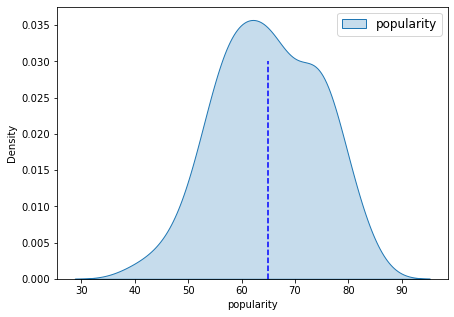

In [39]:
plt.title("Boxplot for POP")
sns.boxplot(x='spch', data=df_70s)
plt.show()

Q1 = np.percentile(popularity_arr, 25, interpolation='midpoint')
Q3 = np.percentile(popularity_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(popularity_arr) > RUB)

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=popularity_arr, shade=True)
plt.legend(['popularity'], fontsize=12)
plt.vlines(x=popularity_arr.mean(), ymin=0, ymax=0.03, color='blue', linestyle='--')
plt.show()

#### Has Winning Award

In [69]:
win_arr = df_70s['has_win_award']

In [70]:
win_arr.value_counts()

0.0    101
1.0      3
Name: has_win_award, dtype: int64

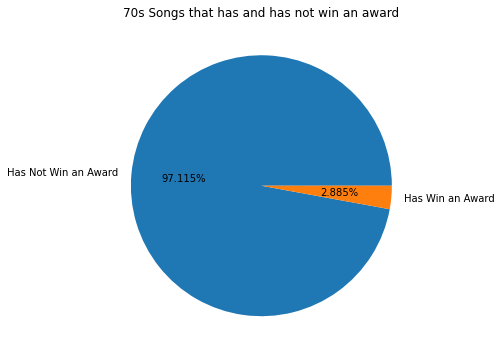

In [73]:
plt.figure(figsize=(6,6))
plt.title('70s Songs that has and has not win an award')
plt.pie(win_arr.value_counts(), labels=['Has Not Win an Award','Has Win an Award'], autopct='%1.3f%%')
plt.show()

Only 3 (2.885%) of the most popular songs from the 70s has win an award.

In [51]:
# Correlation map
df_70s.corr(method='pearson')

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award
year,1.000000,-0.041558,0.232814,0.172110,0.200561,0.039492,0.186671,-0.160471,-0.148508,-0.017678,-0.276680,-0.070872
bpm,-0.041558,1.000000,0.038774,-0.095560,-0.044142,-0.018616,0.044797,0.052125,-0.127571,0.129123,-0.072117,0.003404
nrgy,0.232814,0.038774,1.000000,0.366248,0.689531,0.121791,0.508909,0.030407,-0.624053,0.436489,-0.115439,-0.023698
dnce,0.172110,-0.095560,0.366248,1.000000,0.117634,-0.038819,0.680564,0.017006,-0.350125,0.087649,0.007383,-0.050318
dB,0.200561,-0.044142,0.689531,0.117634,1.000000,0.129274,0.136555,0.034079,-0.290991,0.335187,-0.069525,0.055469
live,0.039492,-0.018616,0.121791,-0.038819,0.129274,1.000000,0.027975,-0.041507,-0.120916,0.143605,0.026471,0.252113
val,0.186671,0.044797,0.508909,0.680564,0.136555,0.027975,1.000000,-0.157382,-0.458129,0.016982,-0.156941,-0.167505
dur,-0.160471,0.052125,0.030407,0.017006,0.034079,-0.041507,-0.157382,1.000000,-0.138132,-0.124008,0.224916,0.149523
acous,-0.148508,-0.127571,-0.624053,-0.350125,-0.290991,-0.120916,-0.458129,-0.138132,1.000000,-0.329176,-0.035391,-0.038603
spch,-0.017678,0.129123,0.436489,0.087649,0.335187,0.143605,0.016982,-0.124008,-0.329176,1.000000,0.094371,0.226744


Text(0.5, 1.0, 'Correlation matrix')

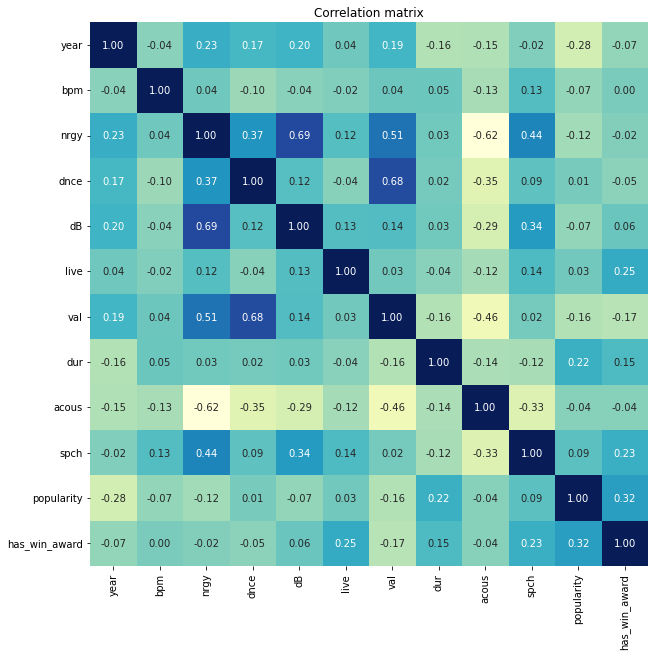

In [53]:
# Visualization heatmap correlation matrix
plt.figure(figsize=(10,10))

sns.heatmap(df_70s.select_dtypes(np.number).corr(), 
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=df_70s.select_dtypes(np.number).columns,
        yticklabels=df_70s.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

### Insights

<AxesSubplot:xlabel='dB', ylabel='nrgy'>

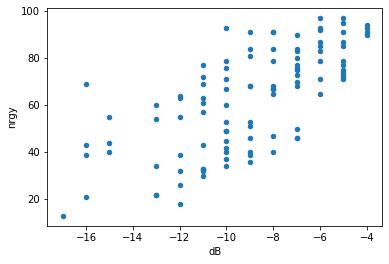

In [58]:
# dB and nrgy correlation
df_70s.plot.scatter(x='dB', y='nrgy', figsize=(6,4))

By the rule of thumb, there is a moderate positive correlation between nrgy and db. That is, the louder the song, the more energetic the song is.

<AxesSubplot:xlabel='dnce', ylabel='val'>

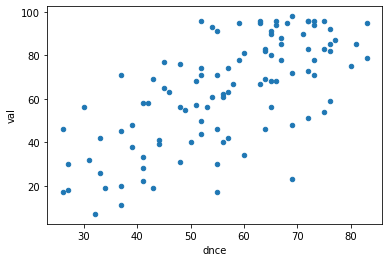

In [62]:
# dnce and val correlation
df_70s.plot.scatter(x='dnce', y='val', figsize=(6,4))

There is a moderate positive correlation between dnce and val. There is a weak trend: the more positive the mood of the song, the easier it is to dance to the song.

#### Artists

In [66]:
artist_arr = df_70s['artist']

In [67]:
artist_arr.value_counts()

Queen               8
Elton John          8
ABBA                7
Barbra Streisand    4
Diana Ross          3
                   ..
Curtis Mayfield     1
Donny Hathaway      1
AC/DC               1
The Spinners        1
T. Rex              1
Name: artist, Length: 71, dtype: int64

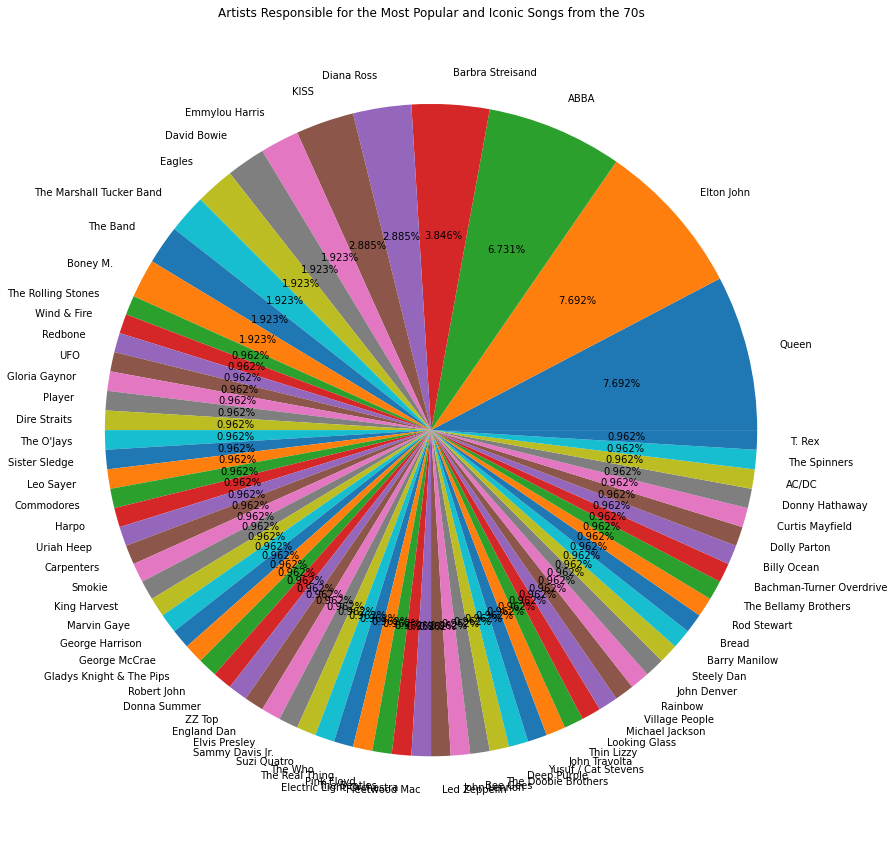

In [80]:
# Artists Responsible for the Most Popular and Iconic Songs from the 70s
plt.figure(figsize=(15,15))
plt.title('Artists Responsible for the Most Popular and Iconic Songs from the 70s')

plt.pie(artist_arr.value_counts(), labels=artist_arr.value_counts().index.tolist(), autopct='%1.3f%%')
plt.show()

Big names, such as Queen, Elton John, and ABBA accounts for more than 20% of the most popular songs in the 70s.